## Prenom: Mouhammed
## Nom: Niah

______

# 1) Exploration de nos données

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


=====================================================================================================================

#### Definition des variables
$\color{red}{\text{Outcome}}$ : qui veut dire resultat ( resultat du diabête)\
$\color{red}{\text{BloodPressure}}$: Tension artérielle\
$\color{red}{\text{Glucose}}$: Glucose\
$\color{red}{\text{Insulin}}$: Insuline\
$\color{red}{\text{Age}}$: Age\
$\color{red}{\text{SkinThickness}}$: Epaisseur du peau\
$\color{red}{\text{DiabetesPedigreeFunction}}$: 
$\color{red}{\text{Pregnancies}}$: Grossesse\
$\color{red}{\text{BMI}}$: Indice de Masse Corporelle

====================================================================================================================

#### Information sur le dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

==================================================================================================================

In [6]:
df.isna().sum()/df.shape[0]

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

<AxesSubplot:>

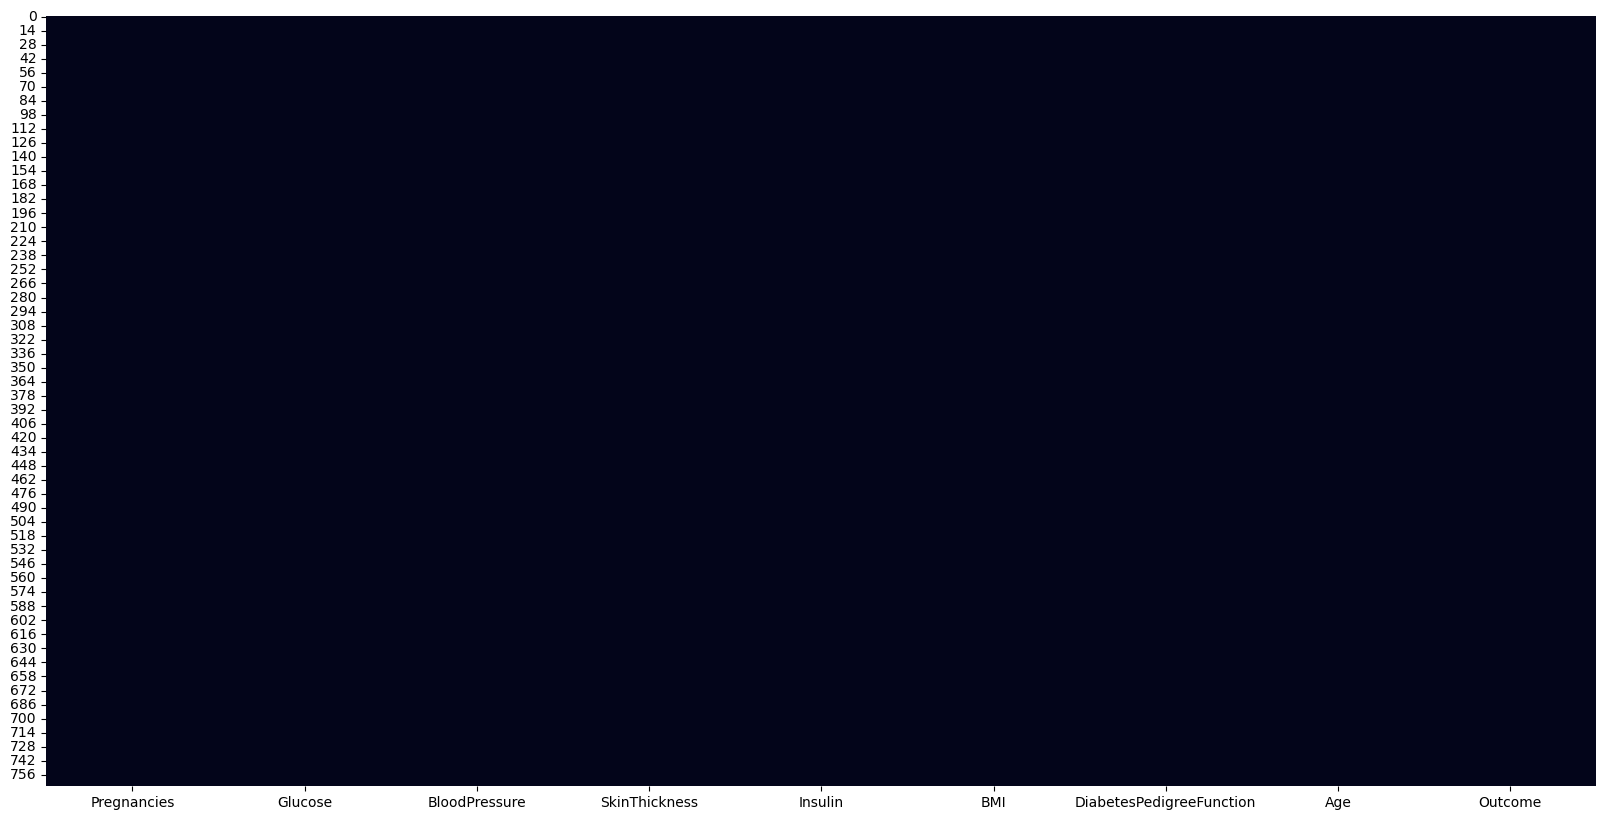

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

#### Les statisstiques du dataset

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


===================================================================================================================

#### Le target( la variable à predire)
c'est la variable Outcome qui veut dire Resultats

=====================================================================================================================

#### Division notre dataset en deux classe:
la classe des personnes atteient du diabete etla casse des personnes non attaint

In [7]:
df_yes=df[df['Outcome']==1]
df_non=df[df['Outcome']==0]

In [8]:
df_yes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [9]:
df_non.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


====================================================================================================================

#### -Relation entre Target/Glucose

/home/mouhammed/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mouhammed/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


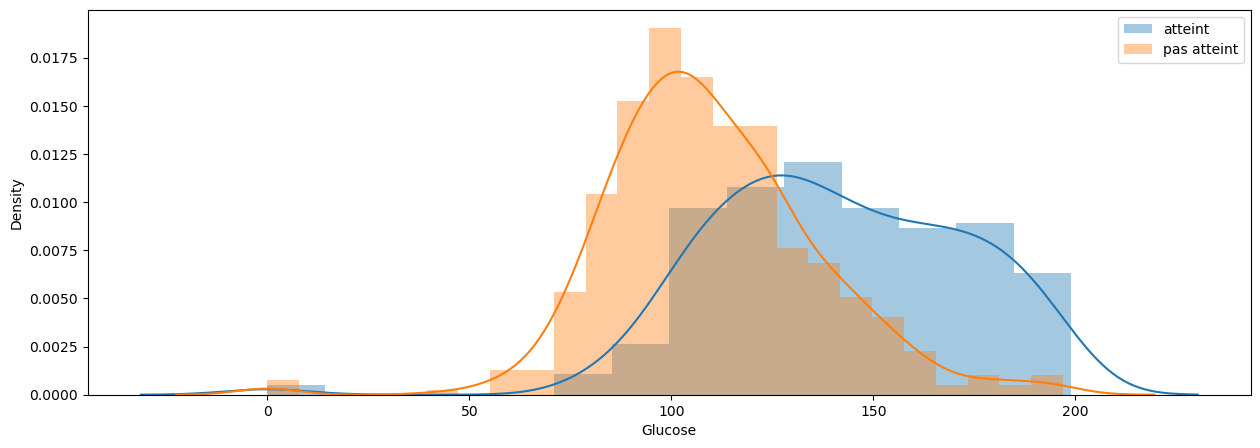

In [10]:
plt.figure(figsize=(15,5))
sns.distplot(df_yes['Glucose'],label='atteint')
sns.distplot(df_non['Glucose'],label='pas atteint')
plt.legend()
plt.show()

#### $\color{blue}{\text{Analyse des Données sur le Diabète}}$

Lors de notre analyse, une disparité significative du taux de glucose entre les individus atteints et non atteints de diabète a été observée. Cette observation nous conduit à formuler l'hypothèse suivante : **Le taux de glucose pourrait être un facteur déterminant pour identifier la présence du diabète chez un individu. Cette hypothèse nécessite une vérification approfondie lors du traitement ultérieur de nos données.**

---

#### $\color{red}{\text{Commentaires sur l'Hypothèse}}$

Cette observation souligne l'importance de la variable « Glucose » dans notre étude. Nous considérerons donc, par hypothèse, que cette variable a un impact significatif sur le diagnostic du diabète. Cette hypothèse sera rigoureusement évaluée et analysée dans le cadre de notre projet, afin de mieux comprendre son rôle et son influence dans le contexte du diabète.

---

**Note :** Il est essentiel de conduire une analyse statistique approfondie pour confirmer ou infirmer cette hypothèse et établir des conclusions robustes basées sur les données.


==================================================================================================================

#### -Relation entre Target/BloodPressure

/home/mouhammed/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mouhammed/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


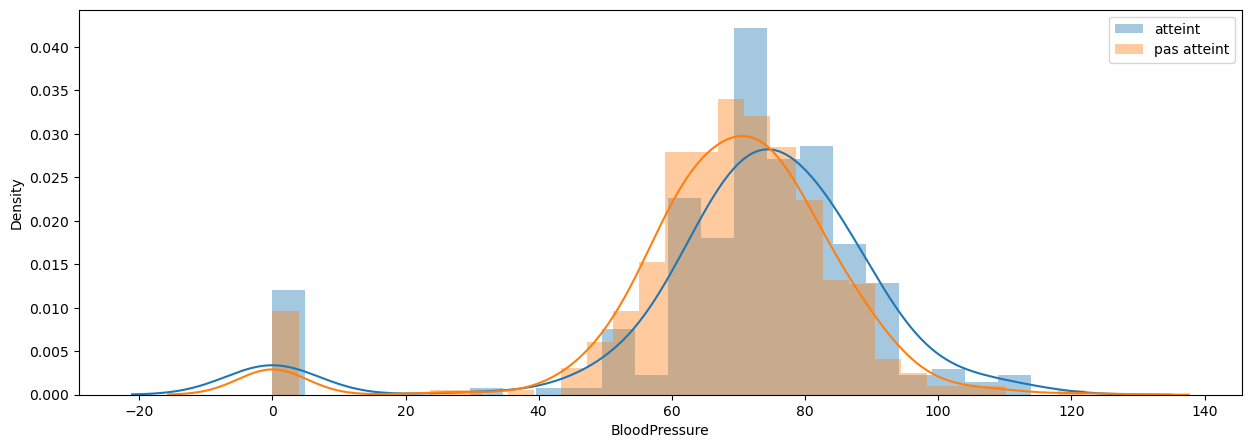

In [11]:
plt.figure(figsize=(15,5))
sns.distplot(df_yes['BloodPressure'],label='atteint')
sns.distplot(df_non['BloodPressure'],label='pas atteint')
plt.legend()
plt.show()

#### $\color{blue}{\text{Commentaires sur la Tension Artérielle}}$

La visualisation des deux distributions pour cette variable nous permet de constater qu'il n'y a pas de différence significative entre la tension artérielle des personnes atteintes du diabète et de celles qui ne le sont pas.

---

**Note :** Bien que la tension artérielle ne semble pas être un indicateur distinctif dans notre étude, il est important de continuer à examiner d'autres variables et à effectuer des analyses approfondies pour obtenir une image complète des facteurs liés au diabète.


===============================================================================================================

#### -Relation entre Target/ Age

In [9]:
def age_grouper(var):
    if df[var]<25:
        df['age_grouper']='jeune'
    elif df[var]>=25 and df[var]<50:
        df['age_grouper']='Adulte'
    else:
        df['age_grouper']='vieux'

In [14]:
def age_grouper(df):
    conditions = [
        (df['Age'] < 25),
        (df['Age'] >= 25) & (df['Age'] < 50),
        (df['Age'] >= 50)
    ]
    
    choices = ['jeune', 'Adulte', 'vieux']
    
    df['age_grouper'] = np.select(conditions, choices, default='Inconnu')
    return df

# Appeler la fonction
df = age_grouper(df)

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_grouper
0,6,148,72,35,0,33.6,0.627,50,1,vieux
1,1,85,66,29,0,26.6,0.351,31,0,Adulte
2,8,183,64,0,0,23.3,0.672,32,1,Adulte
3,1,89,66,23,94,28.1,0.167,21,0,jeune
4,0,137,40,35,168,43.1,2.288,33,1,Adulte


In [18]:
df.groupby('age_grouper')['Outcome'].count()

age_grouper
Adulte    460
jeune     219
vieux      89
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='age_grouper', ylabel='count'>

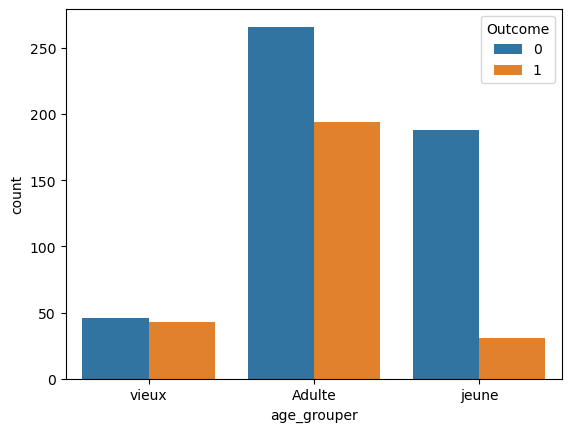

In [16]:
sns.countplot(x=df['age_grouper'],hue='Outcome',data=df)

#### $\color{blue}{\text{Analyse du Groupe d'Âge et du Résultat du Test de Diabète}}$

En examinant notre dataset, nous avons regroupé les participants en trois catégories d'âge : **jeune** (0 à 25 ans), **adulte** (26 à 50 ans) et **vieux** (51 ans et plus). Voici la répartition du nombre de participants dans chaque groupe d'âge avec leur résultat de test de diabète associé :

- **Jeune (0-25 ans)** : 219 participants, nombre de cas positifs au diabète : [insérer le nombre de cas positifs chez les jeunes].
- **Adulte (26-50 ans)** : 460 participants, nombre de cas positifs au diabète : [insérer le nombre de cas positifs chez les adultes].
- **Vieux (51 ans et plus)** : 89 participants, nombre de cas positifs au diabète : [insérer le nombre de cas positifs chez les personnes âgées].

Ces chiffres révèlent une répartition inégale des résultats positifs au test de diabète dans chaque groupe d'âge. En particulier, la catégorie des **adultes** semble avoir un nombre significativement plus élevé de cas positifs par rapport aux autres groupes d'âge.

#### $\color{red}{\text{Hypothèse :}}$
Il est possible que l'âge soit un facteur important dans la prédisposition au diabète. Les adultes, en particulier ceux âgés de 26 à 50 ans, pourraient présenter des caractéristiques physiologiques ou des habitudes de vie qui augmentent leur risque de développer le diabète. Il serait intéressant d'explorer plus en profondeur les variables associées à ces groupes d'âge spécifiques pour comprendre les raisons de cette disparité.



=====================================================================================================================

#### -Relation Target/Insulin

/home/mouhammed/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mouhammed/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


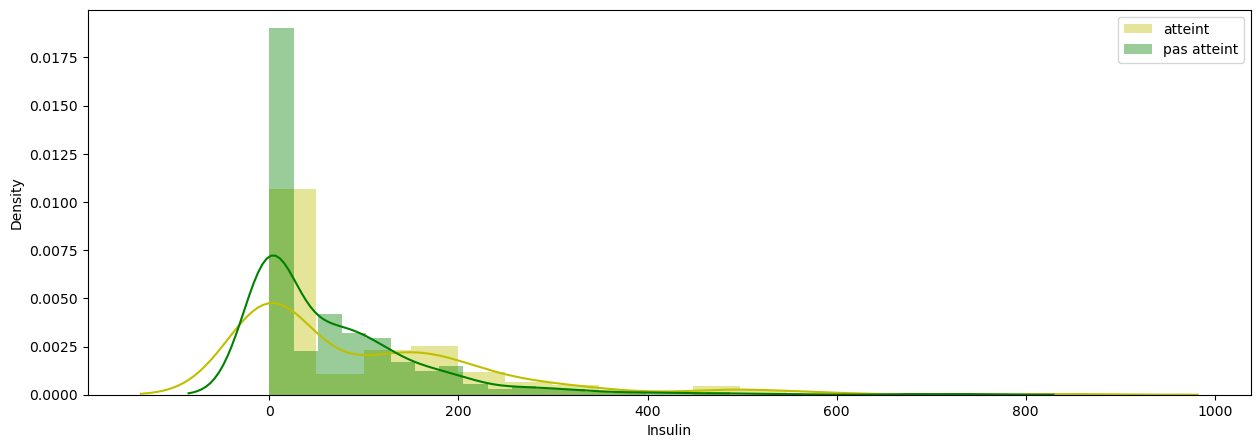

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(df_yes['Insulin'],color='y',label='atteint')
sns.distplot(df_non['Insulin'],color='g',label='pas atteint')
plt.legend()
plt.show()

#### $\color{blue}{\text{Commentaires sur la Variable Insuline}}$

Suite à la visualisation des distributions, il est évident que les deux distributions sont presque identiques. Cette observation nous conduit à poser l'hypothèse suivante : **La variable "Insuline" pourrait ne pas avoir un impact significatif sur la variable à prédire dans notre étude sur le diabète.**

---

**Note :** Cette hypothèse nécessitera une validation rigoureuse à travers des analyses statistiques approfondies. Il est crucial de continuer à explorer d'autres variables et de mener des tests plus poussés pour confirmer ou infirmer cette observation.


=====================================================================================================================

#### Relation Target/Pregnancies

/home/mouhammed/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mouhammed/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


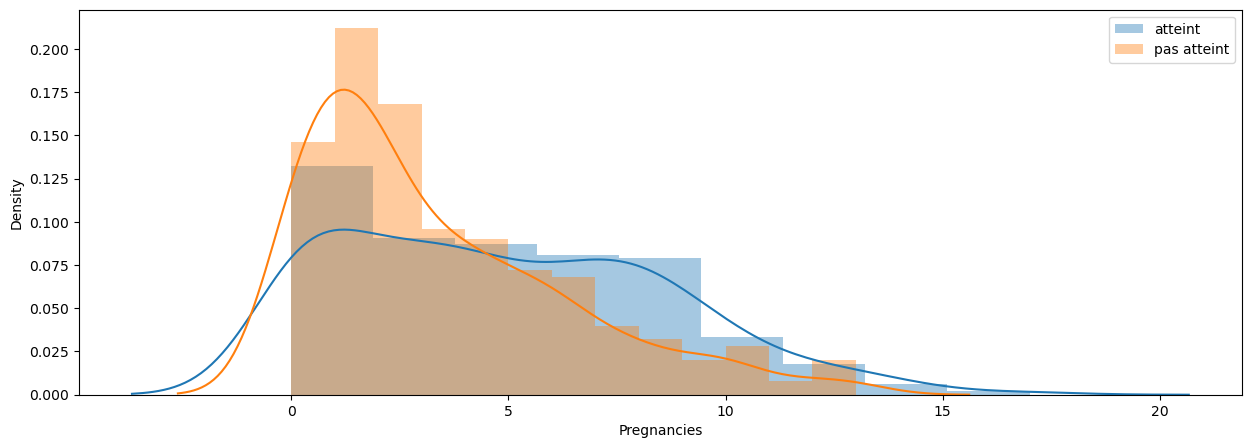

In [14]:
plt.figure(figsize=(15,5))
sns.distplot(df_yes['Pregnancies'],label='atteint')
sns.distplot(df_non['Pregnancies'],label='pas atteint')
plt.legend()
plt.show()

#### $\color{blue}{\text{Commentaires sur la Variable "Pregnancies"}}$

Après avoir examiné visuellement les distributions, il est clair que les deux distributions sont pratiquement identiques. Cette constatation nous amène à émettre l'hypothèse suivante : **La variable "Pregnancies" pourrait ne pas avoir un impact significatif sur la variable à prédire dans notre étude sur le diabète.**

---

**Note :** Pour confirmer cette hypothèse, des analyses statistiques plus approfondies seront nécessaires. Il est essentiel de poursuivre l'exploration des données en examinant d'autres variables et en effectuant des tests approfondis pour valider ou réfuter cette observation.


======================================================================================================================

#### - Relation entre Target/DiabetesPedigreeFunction

In [15]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


/home/mouhammed/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mouhammed/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


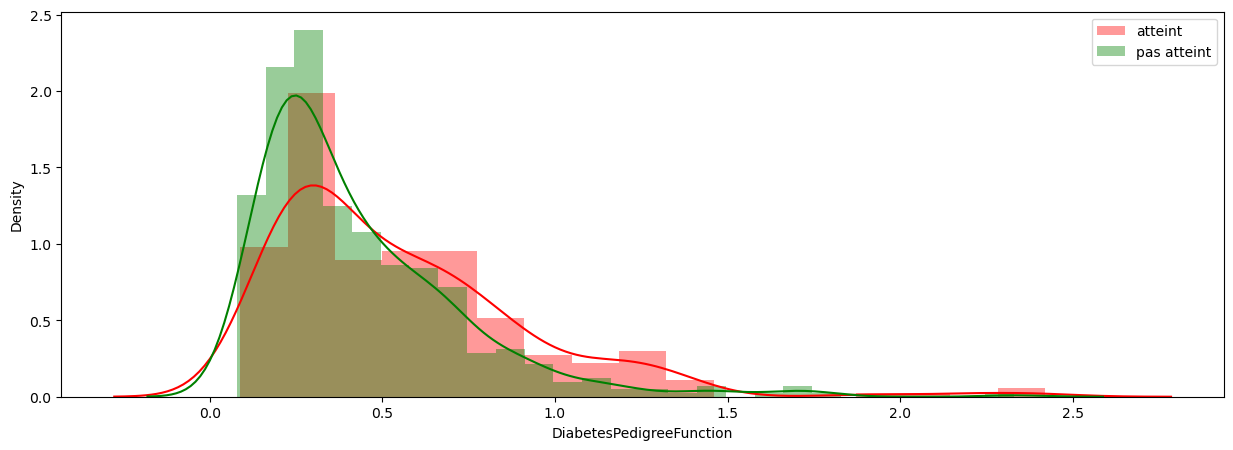

In [16]:
plt.figure(figsize=(15,5))
sns.distplot(df_yes['DiabetesPedigreeFunction'],color='r',label='atteint')
sns.distplot(df_non['DiabetesPedigreeFunction'],color='g',label='pas atteint')
plt.legend()
plt.show()

#### $\color{blue}{\text{Commentaires sur la Variable "DiabetesPedigreeFunction"}}$

Après avoir examiné visuellement les distributions, il est évident que les deux distributions sont presque identiques. Cette observation nous conduit à poser l'hypothèse suivante : **La variable "DiabetesPedigreeFunction" pourrait ne pas avoir un impact significatif sur la variable à prédire dans notre étude sur le diabète.**

---

**Note :** Pour confirmer cette hypothèse, des analyses statistiques plus approfondies seront nécessaires. Il est primordial de poursuivre l'exploration des données en examinant d'autres variables et en effectuant des tests plus poussés pour valider ou réfuter cette observation.


In [19]:
df.drop('age_grouper',axis=1,inplace=True)

# 2) Modelisation

===============================================================================================================

### A) L'algorithme : KNeighborsClassifier (Plus proche voisin)

La classification basée sur les voisins est un type d'apprentissage basé sur les instances ou l'apprentissage non généralisateur : elle ne tente pas de construire un modèle interne général, mais stocke simplement les instances des données d'apprentissage. La classification est calculée à partir d'un simple vote majoritaire des voisins les plus proches de chaque point : un point d'interrogation se voit attribuer la classe de données qui a le plus de représentants parmi les voisins les plus proches du point.

Cet algorithme se base sur la proximité des données pour effectuer des prédictions, en considérant que les données similaires ont tendance à avoir la même classe. Cela en fait un choix populaire pour les problèmes de classification où la structure des données est importante. Cependant, il est essentiel de choisir judicieusement le nombre de voisins à considérer, car cela peut avoir un impact significatif sur les performances de l'algorithme. Une sélection appropriée de la distance métrique est également cruciale pour obtenir des résultats préci

#### A) a) Creons notre premier model de la maniere la plus basique....

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [22]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
model=SVC()

In [25]:
model.fit(x_train,y_train)
c=model.score(x_test,y_test)
print('le modele donne \n ')
print('une efficacité de ',c*100,'% \n')
print('une erreur de',100-c*100,'%')

le modele donne 
 
une efficacité de  79.22077922077922 % 

une erreur de 20.77922077922078 %


In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
y_pred=model.predict(x_test)

<AxesSubplot:>

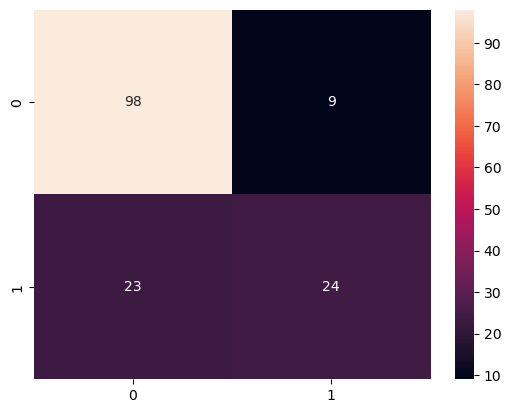

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#### $\color{blue}{\text{Commentaire}}$

Nous avons obtenu un score de 75%, ce qui signifie que le modèle donne de bonnes réponses dans 75% des cas. Cependant, en examinant la visualisation des résultats du modèle selon les classes, nous constatons que le modèle n'est pas très efficace dans le classement de la classe 1. Sur les 41 occurrences possibles, le modèle a fait 18 mauvais classements.

Pour améliorer notre modèle, nous allons d'abord rechercher le nombre de voisins le plus pertinent afin d'obtenir le meilleur modèle possible. Il est essentiel d'optimiser ce paramètre pour améliorer la précision du modèle, en particulier pour la classe 1, où nous observons actuellement des erreurs significatives. En ajustant soigneusement ce nombre de voisins, nous visons à renforcer les performances du modèle et à réduire le nombre de mauvais classements, en particulier dans les cas critiques liés à la classe 1.

In [30]:
for k in range(3,21):
    modele=KNeighborsClassifier(k)
    modele.fit(x_train,y_train)
    score=modele.score(x_test,y_test)
    print('pour k =',k,'le modele du KNeighborsClassifier donne une score de',score*100,'%')

pour k = 3 le modele du KNeighborsClassifier donne une score de 72.07792207792207 %
pour k = 4 le modele du KNeighborsClassifier donne une score de 77.27272727272727 %
pour k = 5 le modele du KNeighborsClassifier donne une score de 75.32467532467533 %
pour k = 6 le modele du KNeighborsClassifier donne une score de 77.92207792207793 %
pour k = 7 le modele du KNeighborsClassifier donne une score de 75.97402597402598 %
pour k = 8 le modele du KNeighborsClassifier donne une score de 77.92207792207793 %
pour k = 9 le modele du KNeighborsClassifier donne une score de 77.27272727272727 %
pour k = 10 le modele du KNeighborsClassifier donne une score de 79.22077922077922 %
pour k = 11 le modele du KNeighborsClassifier donne une score de 76.62337662337663 %
pour k = 12 le modele du KNeighborsClassifier donne une score de 78.57142857142857 %
pour k = 13 le modele du KNeighborsClassifier donne une score de 79.22077922077922 %
pour k = 14 le modele du KNeighborsClassifier donne une score de 79.2207

/home/mouhammed/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/mouhammed/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

$\color{red}{\text{Nous allons continuer par la suite avec k=19 car le modele obtient une meilleure score(79,8%) pour K=19}}$

======================================================================================================================

#### A) b) Normalisation des données

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
X=StandardScaler().fit_transform(x)
Y=y

In [33]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [35]:
model=SVC()

In [36]:
model.fit(X_train,Y_train)
b=model.score(X_test,Y_test)
print('le modele donne \n ')
print('une efficacité de ',b*100,'% \n')
print('une erreur de',100-b*100,'%')

le modele donne 
 
une efficacité de  79.22077922077922 % 

une erreur de 20.77922077922078 %


==================================================================================================================

In [37]:
model=KNeighborsClassifier(19)

In [38]:
model.fit(X_train,Y_train)
b=model.score(X_test,Y_test)
print('le modele donne \n ')
print('une efficacité de ',b*100,'% \n')
print('une erreur de',100-b*100,'%')

le modele donne 
 
une efficacité de  80.51948051948052 % 

une erreur de 19.480519480519476 %


/home/mouhammed/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [33]:
scor=[]
for k in range(1,11):
    for i in range(1,10):
        mode=make_pipeline(StandardScaler(),PolynomialFeatures(i),KNeighborsClassifier(k))
        mode.fit(x_train,y_train)
        score=mode.score(x_test,y_test)
        scor.append(mode.score(x_test,y_test))
            
        print('Pour k =',k,'et i=',i,'on a une score de',score*100,'%')
max(scor)

Pour k = 1 et i= 1 on a une score de 73.37662337662337 %
Pour k = 1 et i= 2 on a une score de 71.42857142857143 %
Pour k = 1 et i= 3 on a une score de 69.48051948051948 %
Pour k = 1 et i= 4 on a une score de 68.83116883116884 %
Pour k = 1 et i= 5 on a une score de 69.48051948051948 %
Pour k = 1 et i= 6 on a une score de 69.48051948051948 %
Pour k = 1 et i= 7 on a une score de 68.83116883116884 %
Pour k = 1 et i= 8 on a une score de 68.83116883116884 %
Pour k = 1 et i= 9 on a une score de 70.12987012987013 %
Pour k = 2 et i= 1 on a une score de 76.62337662337663 %
Pour k = 2 et i= 2 on a une score de 77.27272727272727 %
Pour k = 2 et i= 3 on a une score de 77.27272727272727 %
Pour k = 2 et i= 4 on a une score de 74.67532467532467 %
Pour k = 2 et i= 5 on a une score de 73.37662337662337 %
Pour k = 2 et i= 6 on a une score de 74.67532467532467 %
Pour k = 2 et i= 7 on a une score de 74.67532467532467 %
Pour k = 2 et i= 8 on a une score de 73.37662337662337 %
Pour k = 2 et i= 9 on a une sco

0.8246753246753247

$\color{red}{\text{on obtient une meilleure score (82,5%) pour K=10,et i=7.}}$
$\color{red}{\text{par la suite nous allons continuer avec k=10 (nombre de voisin) et i=7( degre du polynome)}}$

In [34]:
modele= mode=make_pipeline(StandardScaler(),PolynomialFeatures(7),KNeighborsClassifier(10))
modele.fit(x_train,y_train)
d=score=modele.score(x_test,y_test)
print('le modele donne \n ')
print('une efficacité de ',d*100,'% \n')
print('une erreur de',100-d*100,'%')

le modele donne 
 
une efficacité de  82.46753246753246 % 

une erreur de 17.532467532467535 %


=================================================================================================================

#### Corrélation

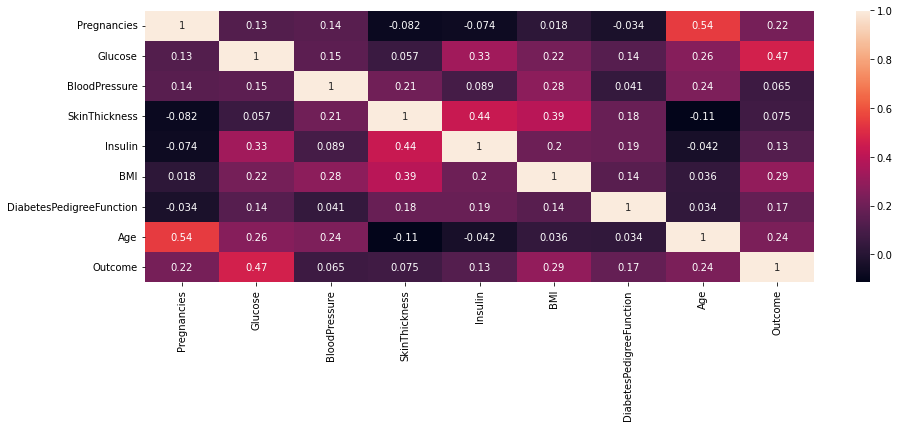

In [35]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

====================================================================================================================

#### Selection de meilleure variable

In [36]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [37]:
from sklearn.feature_selection import SelectKBest,chi2

In [38]:
chi2(x,y)

(array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
        2175.56527292,  127.66934333,    5.39268155,  181.30368904]),
 array([4.55261043e-026, 5.48728628e-309, 2.71819252e-005, 3.15697650e-013,
        0.00000000e+000, 1.32590849e-029, 2.02213728e-002, 2.51638830e-041]))

In [39]:
select=SelectKBest(chi2,k=4)
select.fit_transform(x,y)
select.get_support()

array([False,  True, False, False,  True,  True, False,  True])

### $\color{green}{\text{les 4 variables selectionnées sont: Glucose, Insulin, BMI et L'Age}}$

====================================================================================================================

In [40]:
df.drop(['BloodPressure','SkinThickness','DiabetesPedigreeFunction'],axis=1,inplace=True)

In [41]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
scor=[]
for k in range(1,7):
    for i in range(1,10):
        mode=make_pipeline(StandardScaler(),PolynomialFeatures(i),KNeighborsClassifier(k))
        mode.fit(x_train,y_train)
        score=mode.score(x_test,y_test)
        scor.append(mode.score(x_test,y_test))
            
        print('Pour k =',k,'et i=',i,'on a une score de',score*100,'%')
max(scor)

Pour k = 1 et i= 1 on a une score de 73.37662337662337 %
Pour k = 1 et i= 2 on a une score de 74.02597402597402 %
Pour k = 1 et i= 3 on a une score de 75.97402597402598 %
Pour k = 1 et i= 4 on a une score de 76.62337662337663 %
Pour k = 1 et i= 5 on a une score de 75.97402597402598 %
Pour k = 1 et i= 6 on a une score de 75.32467532467533 %
Pour k = 1 et i= 7 on a une score de 74.02597402597402 %
Pour k = 1 et i= 8 on a une score de 75.32467532467533 %
Pour k = 1 et i= 9 on a une score de 74.02597402597402 %
Pour k = 2 et i= 1 on a une score de 79.22077922077922 %
Pour k = 2 et i= 2 on a une score de 77.92207792207793 %
Pour k = 2 et i= 3 on a une score de 76.62337662337663 %
Pour k = 2 et i= 4 on a une score de 74.67532467532467 %
Pour k = 2 et i= 5 on a une score de 73.37662337662337 %
Pour k = 2 et i= 6 on a une score de 74.67532467532467 %
Pour k = 2 et i= 7 on a une score de 74.67532467532467 %
Pour k = 2 et i= 8 on a une score de 74.02597402597402 %
Pour k = 2 et i= 9 on a une sco

0.8311688311688312

In [44]:
modele=make_pipeline(StandardScaler(),PolynomialFeatures(8),KNeighborsClassifier(6))
modele.fit(x_train,y_train)
d=score=modele.score(x_test,y_test)
print('le modele donne \n ')
print('une efficacité de ',d*100,'% \n')
print('une erreur de',100-d*100,'%')

le modele donne 
 
une efficacité de  83.11688311688312 % 

une erreur de 16.883116883116884 %


=====================================================================================================================

### B) Algorithme : LogisticRegression

La régression logistique est un algorithme de classification très répandu, offrant un pouvoir explicatif très fort en raison de sa linéarité.

La régression logistique est couramment utilisée pour les problèmes de classification binaire, où l'objectif est de prédire une des deux classes possibles. Elle utilise une fonction logistique pour modéliser la probabilité qu'un exemple appartienne à une classe particulière. L'algorithme ajuste les poids des caractéristiques en fonction des données d'entraînement, cherchant à minimiser l'erreur de prédiction.

La régression logistique est particulièrement utile lorsque la relation entre les caractéristiques et la classe cible est linéaire ou presque linéaire. Elle est également interprétable, ce qui signifie que vous pouvez comprendre l'influence de chaque caractéristique sur la prédiction.

Cependant, il est important de noter que la régression logistique peut également être étendue aux problèmes de classification multiclasse à l'aide de techniques telles que l'un contre tous (One-vs-Rest) ou l'un contre un (One-vs-One).

Dans l'ensemble, la régression logistique est un outil puissant et polyvalent dans le domaine de l'apprentissage automatique, souvent utilisé pour des problèmes de classification dans divers domaines d'application.


In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logist=LogisticRegression()
logist.fit(x_train,y_train)
l=logist.score(x_test,y_test)
print('le modele donne \n ')
print('une efficacité de ',l*100,'% \n')
print('une erreur de',100-l*100,'%')

le modele donne 
 
une efficacité de  80.51948051948052 % 

une erreur de 19.480519480519476 %


In [47]:
    for i in range(1,10):
        mode=make_pipeline(StandardScaler(),PolynomialFeatures(i),LogisticRegression())
        mode.fit(x_train,y_train)
        score=mode.score(x_test,y_test)
        scor.append(mode.score(x_test,y_test))
            
        print('Pour i=',i,'on a une score de',score*100,'%')

Pour i= 1 on a une score de 80.51948051948052 %
Pour i= 2 on a une score de 79.87012987012987 %
Pour i= 3 on a une score de 76.62337662337663 %
Pour i= 4 on a une score de 78.57142857142857 %


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Pour i= 5 on a une score de 79.22077922077922 %


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pour i= 6 on a une score de 79.22077922077922 %


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pour i= 7 on a une score de 78.57142857142857 %


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pour i= 8 on a une score de 79.87012987012987 %
Pour i= 9 on a une score de 75.32467532467533 %


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=====================================================================================================================

#### Conclusion :

Après avoir comparé les performances des algorithmes KNeighborsClassifier et LogisticRegression, il est clair que le KNeighborsClassifier présente les meilleurs scores. Par conséquent, nous avons décidé de conserver le modèle basé sur l'algorithme KNeighborsClassifier pour la suite de notre travail. Ce choix est basé sur l'efficacité démontrée de l'algorithme dans notre ensemble de données spécifique.

Nous allons poursuivre notre travail en utilisant le modèle KNeighborsClassifier afin d'explorer davantage les données et d'obtenir des insights précieux pour notre étude sur le diabète. Nous restons ouverts à des ajustements et à des améliorations ultérieures si nécessaire, mais pour l'instant, ce modèle offre les performances les plus prometteuses pour notre projet en cours.

In [48]:
modele=make_pipeline(StandardScaler(),PolynomialFeatures(8),KNeighborsClassifier(6))
modele.fit(x_train,y_train)
d=score=modele.score(x_test,y_test)
print('le modele donne \n ')
print('une efficacité de ',d*100,'% \n')
print('une erreur de',100-d*100,'%')

le modele donne 
 
une efficacité de  83.11688311688312 % 

une erreur de 16.883116883116884 %


In [49]:
y_pred=modele.predict(x_test)

<AxesSubplot:>

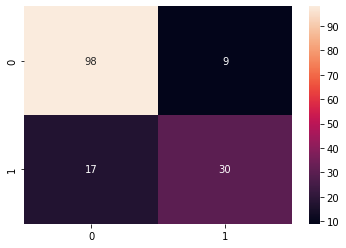

In [50]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

====================================================================================================================

#### Courbe d'apprentissage

In [51]:
from sklearn.model_selection import learning_curve

[ 98 141 185 229 272 316 360 403 447 491]


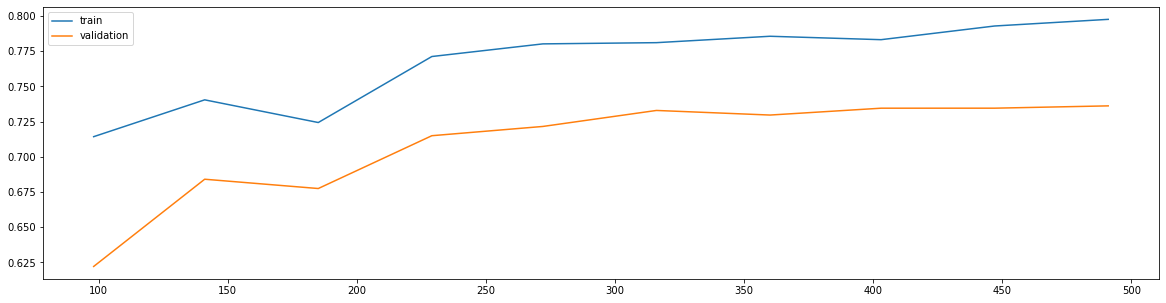

In [52]:
plt.figure(figsize=(20,5))
N,train_score,val_score=learning_curve(modele,x_train,y_train,train_sizes=np.linspace(0.2,1.0,10),cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.legend()
plt.show()

À partir de la courbe, il est évident que lorsque la taille de l'ensemble d'entraînement augmente, les courbes de score d'entraînement et de score de validation convergent. Cette convergence suggère que l'ajout de données d'entraînement supplémentaires améliore la précision de la validation croisée. En d'autres termes, plus nous disposons de données d'entraînement, plus nous avons de chances d'obtenir de meilleurs scores.

Cela met en évidence l'importance de la quantité de données dans le développement de modèles d'apprentissage automatique performants. L'augmentation de la taille de l'ensemble d'entraînement permet au modèle d'apprendre des modèles plus précis et de mieux généraliser aux données de validation ou de test. Cela contribue à améliorer la fiabilité des prédictions du modèle sur de nouvelles données inconnues. En résumé, des données de haute qualité et en quantité suffisante sont essentielles pour obtenir des performances optimales en apprentissage automatique